# Linear Regression - home brew vs scikit-learn

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  
%matplotlib inline

In [6]:
data = pd.read_csv('../../data/Advertising.csv')
data['total_spend'] = (data['TV'] + data['radio'] + data['newspaper'])/10 #scale total_spend to sales

In [7]:
data.head()

,Unnamed: 0,TV,radio,newspaper,sales,total_spend
0,1,230.1,37.8,69.2,22.1,33.71
1,2,44.5,39.3,45.1,10.4,12.89
2,3,17.2,45.9,69.3,9.3,13.24
3,4,151.5,41.3,58.5,18.5,25.13
4,5,180.8,10.8,58.4,12.9,25.00


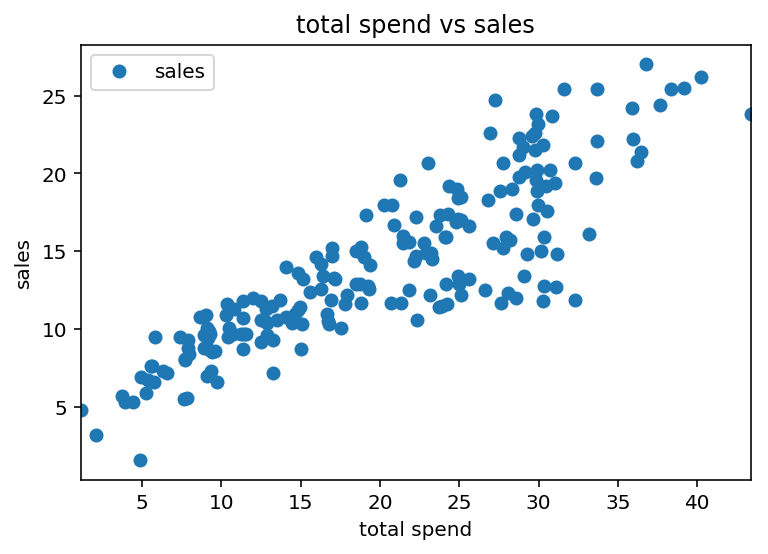

In [24]:
data.plot(x='total_spend', y='sales', style='o')  
plt.title('total spend vs sales')  
plt.xlabel('total spend')  
plt.ylabel('sales')  
plt.show()  

## DIY approach

In [48]:
# helper function to calculate loss
def avg_loss(spendings, sales, w, b):
    N = len(spendings)
    total_error = 0.0
    
    for i in range(N):
        total_error += (sales[i] - (w * spendings[i] + b))**2
    
    return total_error / float(N)

In [49]:
def update_w_and_b(spendings, sales, w, b, alpha):
    dl_dw = 0.0
    dl_db = 0.0
    N = len(spendings)
    
    for i in range(N):
        dl_dw += -2 * spendings[i] * (sales[i] - (w * spendings[i] + b))
        dl_db += -2 * (sales[i] - (w * spendings[i] + b))
        
    # update w and b
    w = w - (1/float(N)) * dl_dw * alpha
    b = b - (1/float(N)) * dl_db * alpha
    
    return w, b

In [53]:
def train(spendings, sales, w, b, alpha, epochs):
    for e in range(epochs):
        w, b = update_w_and_b(spendings, sales, w, b, alpha)
        
        # log the progress
        if e % 1000 == 0:
            print('epoch:', e, 'loss: ', avg_loss(spendings, sales, w, b))
            
    return w, b

In [54]:
def predict(x, w, b):
    return w * x + b

In [55]:
w, b = train(data['total_spend'], data['sales'], 0.0, 0.0, 0.001, 15000)

epoch: 0 loss:  9.894417306428116
epoch: 1000 loss:  8.239383043542533
epoch: 2000 loss:  7.459002946874042
epoch: 3000 loss:  7.0722420301112905
epoch: 4000 loss:  6.880561069290071
epoch: 5000 loss:  6.78556286975927
epoch: 6000 loss:  6.73848120929894
epoch: 7000 loss:  6.7151472644173476
epoch: 8000 loss:  6.703582825559119
epoch: 9000 loss:  6.697851422370157
epoch: 10000 loss:  6.695010905599979
epoch: 11000 loss:  6.693603128960358
epoch: 12000 loss:  6.692905426666231
epoch: 13000 loss:  6.692559641349493
epoch: 14000 loss:  6.6923882681344695


In [58]:
x_new = 23.0
y_new = predict(x_new, w, b)
y_new

15.440023160711576

---

## Scikit-learn approach

In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split  

In [6]:
# extract features and labels in a format suitable for scikit-learn
X = data[['TV', 'radio', 'newspaper']]
y = data['sales']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)  

In [8]:
def train(x, y):
    model = LinearRegression().fit(X_train,y_train)
    return model

In [9]:
model = train(X_train, y_train)

In [10]:
# return interecept and coefficient
print(model.intercept_, model.coef_)  

2.994893030495332 [ 0.04458402  0.19649703 -0.00278146]


In [11]:
y_pred = model.predict(X_test)  

In [12]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df.head()

,Actual,Predicted
18,11.3,10.057396
170,8.4,7.452281
107,8.7,7.019708
98,25.4,24.080297
177,11.7,12.017863


In [13]:
# just for completion!
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred))) 

Mean Absolute Error: 1.361781350209028
Mean Squared Error: 4.402118291449687
Root Mean Squared Error: 2.098122563495681
